# Week 5 Lab: Supervised Learning

<img align="right" style="padding-right:10px;" src="figures_wk5/knn.png" width=300><br>

# Introduction

This week's assignment will focus on completeing a KNN analysis and comparing its performance with other supervised algorithms.


## Our Dataset: 
**Dataset:** bank-additional-full.csv (Provided in folder assign_wk5)


[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

In [40]:
df = pd.read_csv("assign_wk5/bank-additional-full.csv", delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Input variables:
#### bank client data:
   - **age** (numeric)
   - **job:** type of job 
       (categorical)
       - "admin."
       - "blue-collar"
       - "entrepreneur"
       - "housemaid"
       - "management"
       - "retired"
       - "self-employed"
       - "services"
       - "student"
       - "technician"
       - "unemployed"
       - **"unknown"** [][missing]
   - **marital:** marital status 
       (categorical)
       - "divorced"
       - "married"
       - "single"
       - **"unknown"** [][missing]
       **note:** "divorced" means divorced or widowed      
   - **education** 
       (categorical)
      - "basic.4y"
      - "basic.6y"
      - "basic.9y"
      - "high.school"
      - "illiterate"
      - "professional.course"
      - "university.degree"
      - **"unknown"** [][missing]
   - **default:** has credit in default? 
       (categorical)
       - "no"
       - "yes"
       - **"unknown"** [][missing]
   - **housing:** has housing loan? 
       (categorical)
       - "no"
       - "yes"
       - **"unknown"** [][missing]
   - **loan:** has personal loan? 
       (categorical)
       - "no"
       - "yes"
       - **"unknown"** [][missing]
       
#### Related with the Last Contact of the Current Campaign:
  
   - **contact:** contact communication type 
       (categorical)
       - "cellular"
       - "telephone"
       
   - **month:** last contact month of year 
       (categorical)
       - "jan"
       - "feb"
       - "mar"
       - "etc"
       
   - **day_of_week:** last contact day of the week 
      (categorical)
      - "mon"
      - "tue"
      - "wed"
      - "thu"
      - "fri"
      
   - **duration:** last contact duration, in seconds (numeric) 
     
      - **Important note:**  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, *__this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.__*
      
#### Other Attributes:
   
   - **campaign:** number of contacts performed during this campaign and for this client (numeric) 
        - includes last contact
   - **pdays:** number of days that passed by after the client was last contacted from a previous campaign 
      (numeric)
      - 999 means client was not previously contacted
   - **previous:** number of contacts performed before this campaign and for this client 
      (numeric)
      
   - **poutcome:** outcome of the previous marketing campaign 
      (categorical)
      - "failure"
      - "nonexistent"
      - "success"
      
#### Social and Economic Context Attributes:
   
   - **emp.var.rate:** employment variation rate - quarterly indicator 
      (numeric)
      
   - **cons.price.idx:** consumer price index - monthly indicator 
      (numeric)     
      
   - **cons.conf.idx:** consumer confidence index - monthly indicator 
      (numeric)   
      
   - **euribor3m:** euribor 3 month rate - daily indicator 
      (numeric)
      
   - **nr.employed:** number of employees - quarterly indicator 
      (numeric)

  #### Output variable (desired target):
  
   - **y:** has the client subscribed a term deposit? 
      (binary)
      - "yes"
      - "no"

In [42]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Assignment Requirements

## Part 1: KNN Analysis
**Objective:** According to the dataset's text file, the target column the last column in the dataset.

### - Cleanup the dataset as you see deem appropriate. As always, defend your reasoning!!!
       - Missing values?
       - Column names

According to the supporting text file:

There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [44]:
df.replace('unknown', np.nan, inplace=True)

In [54]:
df[df['default'].isnull()]

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,57,services,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,basic.9y,NaN,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,NaN,NaN,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,NaN,NaN,no,no,telephone,may,mon,55,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
15,54,retired,basic.9y,NaN,yes,yes,telephone,may,mon,174,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40886,70,retired,basic.4y,NaN,no,no,cellular,oct,thu,122,1,14,3,failure,-1.1,94.601,-49.5,0.965,4963.6,no
40940,49,admin.,high.school,NaN,no,no,cellular,oct,wed,169,1,6,3,success,-1.1,94.601,-49.5,0.985,4963.6,yes
40941,66,retired,basic.4y,NaN,NaN,NaN,cellular,oct,wed,216,1,6,3,success,-1.1,94.601,-49.5,0.985,4963.6,yes
40969,84,retired,basic.4y,NaN,yes,no,cellular,oct,fri,106,4,999,0,nonexistent,-1.1,94.601,-49.5,0.993,4963.6,no


I don't care much about the marital status so I will drop this column.

In [52]:
df.drop(columns='marital', inplace=True)

I am going to make the assumption that if the customer has no housing or personal loan that their credit is not in default.

In [80]:
if [df['housing'] == 'no'] is True and [df['loan'] == 'no'] is True:
    df['default'].fillna('no', inplace=True)

In [81]:
df.isnull().sum()

age                  0
job                330
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [53]:
df.isnull().sum()

age                  0
job                330
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

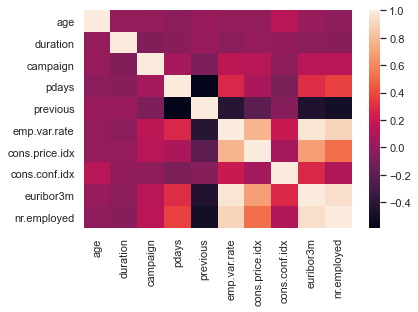

In [43]:
_ = sns.heatmap(df.corr())

### - Prepare the data for machine learning
       - A little EDA goeas a long way
       - Do you need to do anything about data types?

###  - KNN analysis
       - What is your objective from the analysis?
       - What is your optimal K? 
       - How about accuracy rate? 

###  - Discover any insights from this analysis? 
       - Include numbers/graphs corresponding to your conclusions
       - Discuss ways to improve the performance of your KNN model 
       - Defend and backup your thoughts!!!!!!

## Part 2: Comparison to other supervised algorithm

###  - At the end of part 1 you discussed ways to improve the performance of you KNN model. 
       - Implement one of those methods to improve your KNN model performance.
       - Rerun a KNN analysis for your improved dataset
       - Discuss the change in performance from the model in part 1

###  - Complete a K-fold cross-validation analysis for your improved model
       - You need to use at less three additional models
       - Discuss the difference in the performance of the 4 algorithms against your improved dataset.

# Deliverables:


Upload your Jupyter Notebook to the corresponding location in WorldClass. 

**Note::** Make sure you have clearly indicated each assignment requirement within your notebook.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.